# 2. Monte Carlo weighting

Brief recap on:
* cross section
* luminosity

## 2.1 Introduction

Today we will understand how it works to make the MC simulation be in agreement with data.

This problem presents to us because when simulating events it is not always possible to simulate them normalized to the processes cross section. This means that the number of MC events produced will be 'random' and related to the available computing power at the moment of production. 

For example, MC weights are needed first and foremost to normalize the MC sample to the luminosity of the data. Moreover, weights are computed to take into account the different scale factors that we use to improve the description of the data. 

Another example are some backgrounds which are never produced via MC simulation but always in a data driven way for two main reasons:
* the process is extremely difficult to model
* it has a huge cross section

therefore, it would require a huge amount of computation power, which we do not have.

This kind of procedure leads in the end to situations in which:
* one event in MC may represents >50/100 events in data (if we do not have enough computation power to do a 1:1 production)
* one event in MC represents a fraction of an event in data.

For example:

The cross section of the electroweak production of a WW pair is $\sigma \approx 89$fb. 

Therefore at an integrated luminosity of $\mathcal{L} = 59.7$fb$^{-1}$ we would expect a nuber of events $N_{exp} = \sigma\cdot\mathcal{L} \approx 5300$


If in our MC simulation we have $N_{MC} = 23487$ signal events, therefore we will have to weight the MC events by a factor that will make the number of events equal to the expected one at LHC. The scale factor will be $w = N_{exp} / N_{MC} \approx 0.22$

Luckily for us this is already done at tree level and the branch called `weigth` contains not only this scale value we have to apply, but also a bunch of other weights related to different sources must be applied too. They are:

| Branch name | Meaning |
|---|---|
| `XSWeight` | MC simulations normalization to 1 fb$^{-1}$ |
| `puWeight` | equalizing the Pile-Up profile in MC to that one in data |
| `TriggerEffWeight_2l` | trigger efficiency (function of the p$_{T}$ and $\eta$ of the leptons |
| `LepWPCut` | flag if first two leading leptons pass the electron/muon working points | 
| `Trigger_ElMu` | flag 1 for events passing the MuonEG dataset triggers |

All of these weights have to be applied at the level of histograms filling and it is very important to make the histogram 'save' the weights! 

As you know from statistics, when you have to calculate the uncertainty on a number of events it makes a big difference if the events are the result of a counting experiment or if they are the result of a weighting procedure. In the first case the distribution is a Poissonian and the uncertainty is the square root of the number of entries (i.e. $\sqrt{N}$). On the other hand when a histogram is the result of a sum and weighting procedure, the uncertainty on the number of entries is the sum in quadrature of all the weights (i.e. $\sqrt{\sum w^2}$). 

Therefore, it is very important for the histogram you create to save the weight corresponding to the entry you are filling it with. You do it like this:

```python
h = ROOT.TH1F(...)
for ev in events:
    tree.GetEntry(ev)
    w = tree.<weight1> * tree.<weight2> * ...
    h.Fill(tree.<variable>, w)
```

### 2.2 Exercise MC weighting

In [94]:
import uproot

filename  = "tree_complete.root"
name_tree = "sr_highZ/VBS_OS/tree_WWewk"
branches  = ['mjj','pt_1j','pt_2j','eta_1j','ptll','eta_1l','Zepp_ll','weight']

tree_signal = uproot.open(filename)[name_tree] # tree definition
signal_df   = tree_signal.arrays(branches, library='pd') # dataframe (df) definition

signal_df.head()

,mjj,pt_1j,pt_2j,eta_1j,ptll,eta_1l,Zepp_ll,weight
0,184.278137,47.714859,46.298988,-0.074081,72.781059,0.226471,1.297249,0.008133
1,475.591492,309.644379,46.271046,-1.710449,16.897715,0.466858,1.621552,0.004084
2,567.185242,39.650753,38.150513,-1.495361,74.595718,-1.973877,1.511230,0.005516
3,389.621674,109.280838,67.491768,-3.372559,30.638733,0.817017,3.056244,0.003804
4,372.220978,180.758087,124.455849,0.430359,36.703983,2.408691,1.227692,0.004426


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h1 - weighted (Potential memory leak).


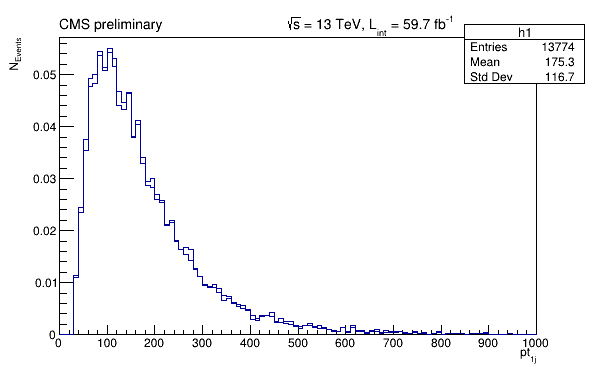

In [95]:
import ROOT

# Create a canvas
c1 = ROOT.TCanvas('c1', 'pt_1j - Pandas DataFrame', 600, 400)

# Create a histogram and draw it
h1 = ROOT.TH1F('h1', ';pt_{1j}; N_{Events}', 100, 0, 1000)
h2 = ROOT.TH1F('h1 - weighted', ';pt_{1j}; N_{Events}', 100, 0, 1000)
for event in signal_df.index:
        h1.Fill(signal_df.pt_1j[event])
        h2.Fill(signal_df.pt_1j[event], signal_df.weight[event])
        
h1.Scale(1/h1.Integral()) # histogram normalization
h2.Scale(1/h2.Integral())

h1.Draw('HIST')
h2.Draw('SAME HIST')
    
# Let's add some CMS style headline
label = ROOT.TLatex()
label.SetNDC(True)
label.SetTextSize(0.040)
label.DrawLatex(0.10, 0.92, '#bf{CMS preliminary}')
label.DrawLatex(0.48, 0.92, '#bf{#sqrt{s} = 13 TeV, L_{int} = 59.7 fb^{-1}}')

# show interactively
c1.Draw()

### 2.3 To do

Apply the weights to the histograms you created for this time. You can use the same code and just modify it to account for all the weights. 

I would suggest you create a duplicate of the script you have, so you can have both the weighted ad the non-weighted cases for when you will have to write the report. (Putting this part in the report I think is good to show that you are undesrtanding how an analysis proceeds).

Fit some distributions with a proper function.